In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

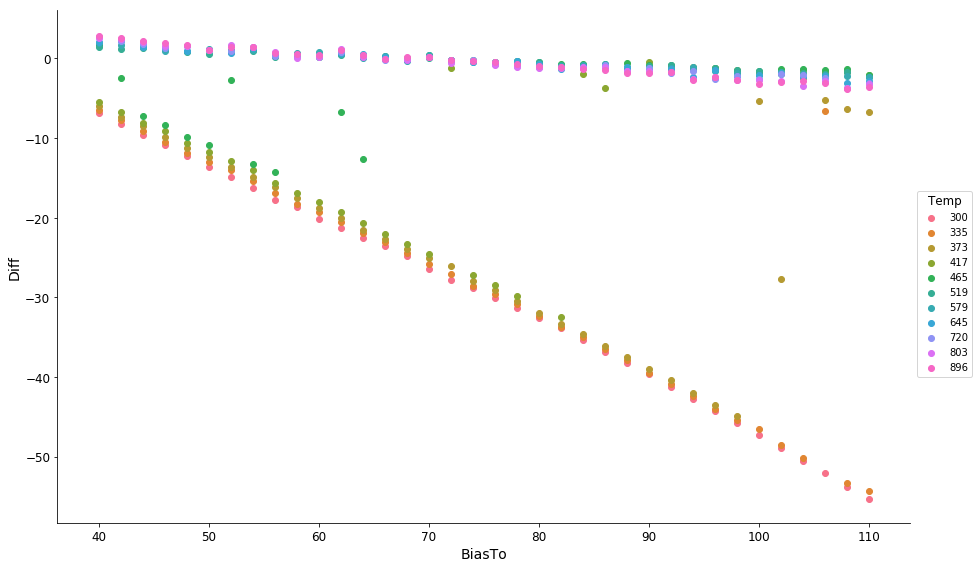

In [22]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/third_start_native/rerun_1_09_May_151931.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 1000").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

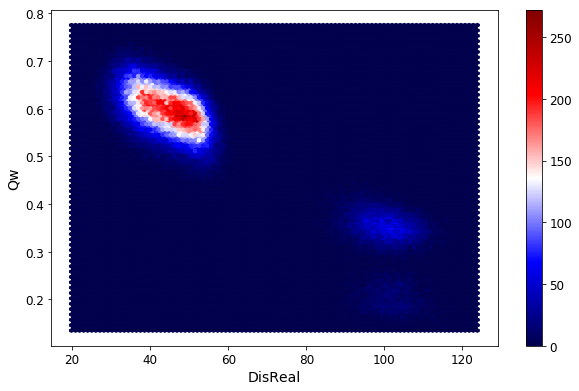

In [25]:
rerun1.query("Temp == 373").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

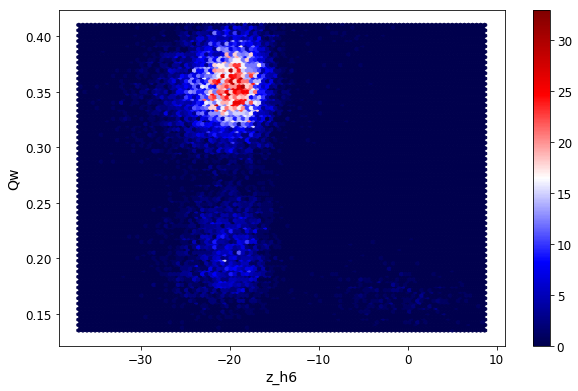

In [28]:
rerun1.query("Temp == 373 and Qw < 0.41").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

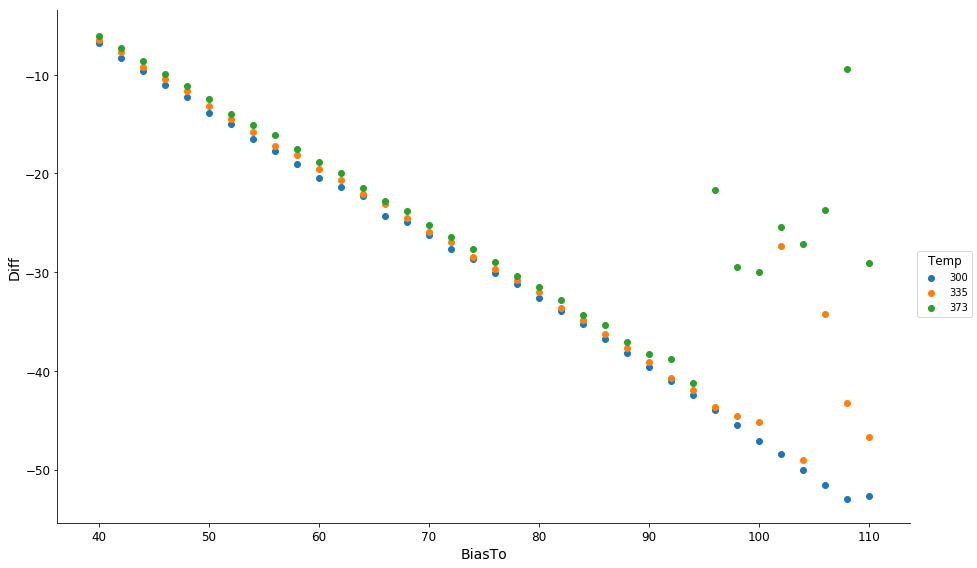

In [3]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/third_start_native/rerun_0_08_May_141202.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun0 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

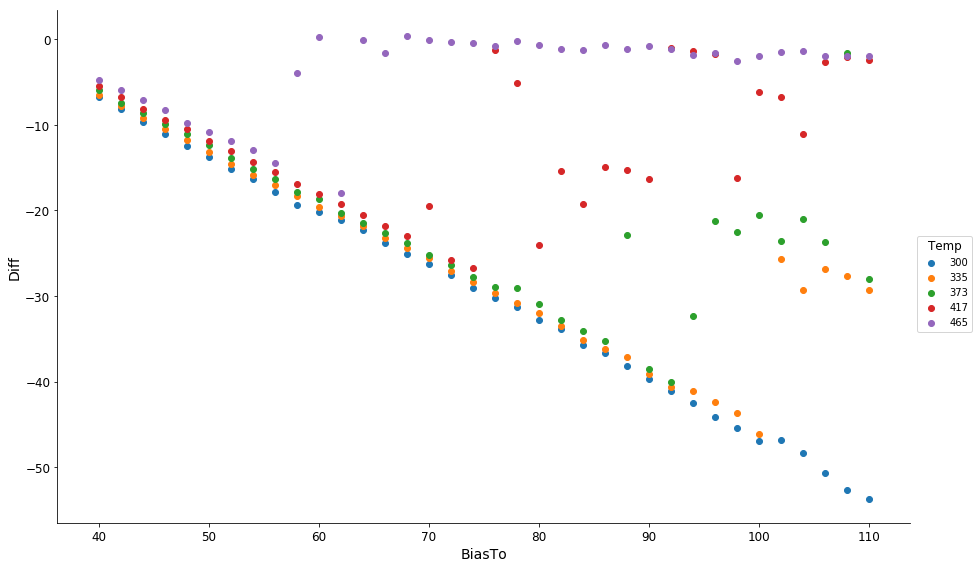

In [10]:
data = pd.read_feather("/Users/weilu/Research/server/may_2018/third_start_native/rerun_1_08_May_141202.feather")
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 500").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [18]:
all_data = pd.concat([rerun0,rerun1])

In [19]:
tmp = temperature_exchange_table(all_data.query("BiasTo == '92.0'"))
tmp

Temp,300,335,373,417,465,519,579,645,720,803,896,1000
0,1262.0,1476.0,2074.0,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1806.0,1473.0,1113.0,608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1862.0,1815.0,977.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70.0,236.0,836.0,2631.0,711.0,516.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,864.0,877.0,1107.0,205.0,585.0,347.0,555.0,460.0
5,NaN,NaN,NaN,1052.0,1848.0,556.0,1356.0,188.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1236.0,2662.0,696.0,245.0,101.0,43.0,7.0,10.0
7,NaN,NaN,NaN,NaN,NaN,NaN,354.0,1245.0,2139.0,364.0,364.0,534.0
8,NaN,NaN,NaN,175.0,341.0,389.0,1081.0,2285.0,693.0,36.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,406.0,671.0,607.0,1246.0,870.0,1200.0


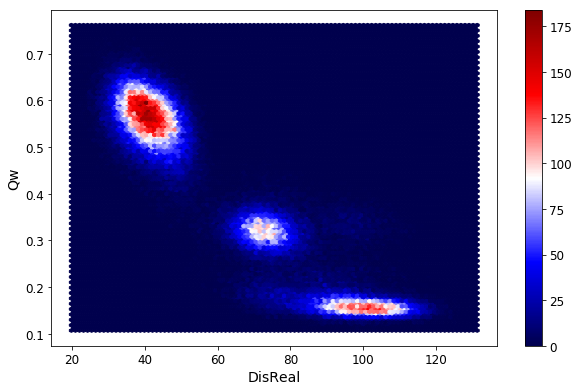

In [11]:
rerun1.query("Temp == 417").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

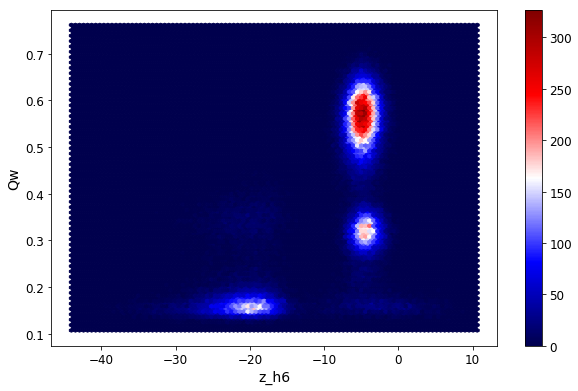

In [12]:
rerun1.query("Temp == 417").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)

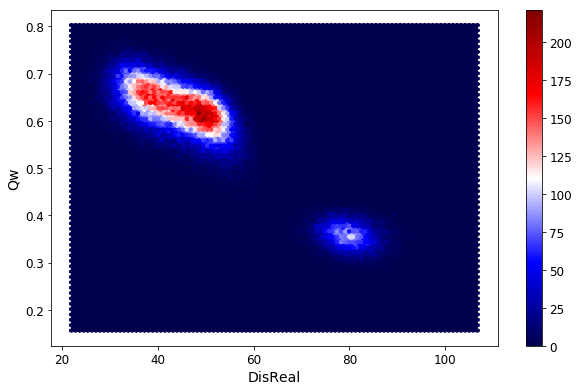

In [6]:
rerun1.query("Temp == 335").plot.hexbin("DisReal", "Qw", cmap="seismic", shaarex=False)

In [17]:
t = rerun1.query("Temp == 335 and Qw < 0.5 and DisReal > 70")
select(t)

count       mean       std        min        25%        50%  \
BiasTo Run                                                                 
102.0  2    1018.0  78.195511  3.483387  70.085855  75.830371  78.015772   
       3    1263.0  78.159247  3.531793  70.053351  75.748761  77.949118   
104.0  0     129.0  79.483856  3.773008  70.427984  77.136322  79.238534   
       2    1378.0  79.154360  3.635096  70.238611  76.679724  79.189781   
       3     442.0  83.941696  4.459803  70.187300  81.021445  84.236771   
106.0  0     896.0  80.296906  3.826959  70.407376  77.538700  80.140168   
       3    1515.0  79.828167  3.717577  70.168918  77.314400  79.786754   
108.0  1    2450.0  80.728042  3.800789  70.506518  78.090576  80.666173   
110.0  1    1275.0  81.660698  4.010160  71.139303  79.011397  81.603757   
       2    1142.0  81.393073  3.799309  70.378611  78.771724  81.340865   
96.0   2     106.0  76.928382  3.389258  70.319177  74.163977  76.578130   

                  75%        max  
BiasTo Run                        
102.0  2    80.778910  88.469515  
       3    80.527869  90.002201  
104.0  0    81.635413  96.372069  
       2    81.607569  91.070309  
       3    87.315994  94.043479  
106.0  0    82.781429  93.917516  
       3    82.238064  91.265282  
108.0  1    83.344654  94.163993  
110.0  1    84.298349  93.805680  
       2    83.914665  93.296941  
96.0   2    79.528042  84.995239

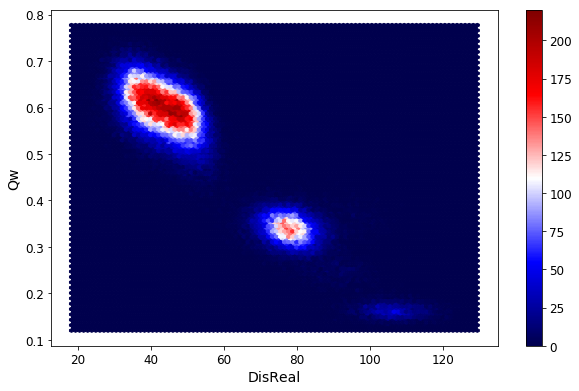

In [9]:
rerun1.query("Temp == 373").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

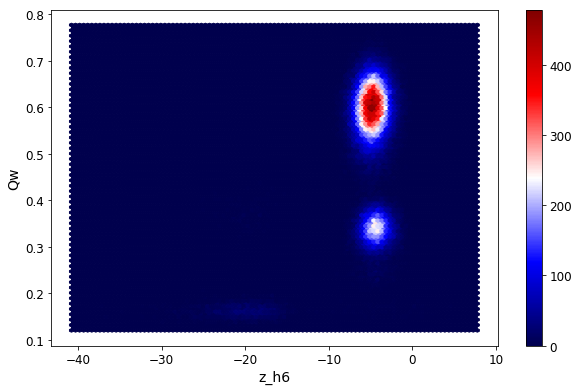

In [14]:
rerun1.query("Temp == 373").plot.hexbin("z_h6", "Qw", cmap="seismic", sharex=False)